## Adaboosting, Gradient Boosting, XGBoost Classifier

**Boosting modeller**de **bias azaltilmaya** calisilir. Bu yolla UNDERFITi azaltir. 

**Biasi azaltmaya surekli devam edersek OVERFIT riski ortaya cikar**. **ADABOOSTta bu risk** var. 


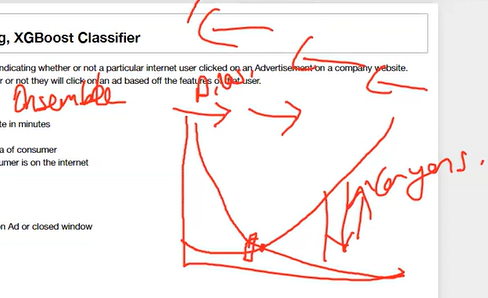

**Baginig** methodlarda tahminler birbirinden **bagimsiz** yapilirken, **Boosting** methodlar birbiriyle **sirali, etkilesimli** calisiyor.

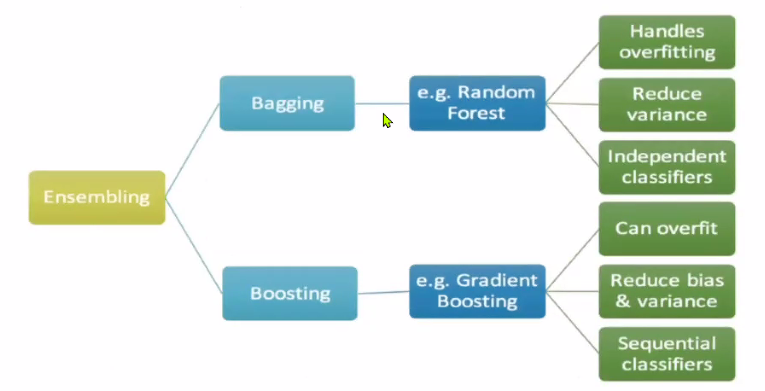

In [51]:
# Baging metodlar varyansi,  boosting metodlar biasi azaltmaya calisir. 
# Adaboost; farkli iyi ozellikleri birlestirip ortaya guclu bir yontem ortaya cikarmis. 
# Adaboost; butun datayla analize giriyor, bilemediklerini diger agaca soyluyor, bilemediklerini agirliklandiriyor, 
# bildiklerinin etkisni azaltiyor, bilemediklerinin agirligini artiriyor, bu sekilde en iyi tahmine ulasiyor. 
# Her bir tahminin zayif yanini gorur, onu daha fazla egitime gonderir, boylece basariyi artirir.  
# Adaboost yanlis bildigi degerlere daha fazla agirlik veriyor. Bunlari cogaltiyor veri setinde ki  bir sonrai asamada onlarin cikma (bilinme) sansi artsin. 


**ADABoost**'un calisma **mantigi**;

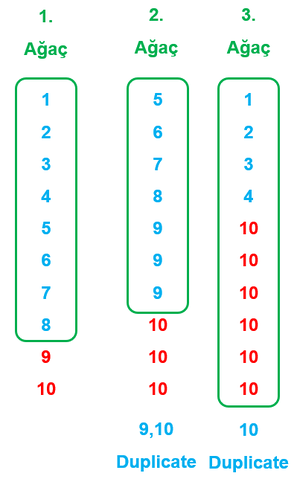

** Mulakat / interview e benziyor. Iceri girip cikan diger bekleyenlere sorulari soyluyor, boylece bekleyenin basarisi artiyor. 

We will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': Consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer. Kisinin bulundugu bolgedeki gelir. 
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window. Tiklama veya siteyi kapattigi zaman
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad. Reklama tiklanip tiklanmadigi.


**Reklama tiklanma durumuyla ilgili gercek bir data seti. Google Analytics'den alinmis**

Google analitic tarafından hazırlanmış internette gezinmiş bir reklamın müşteriler tarafından tıklanıp tıklanmadığını gösteren bir data

Daily Time Spent on Site = O reklam yoluyla tıklanan sitede geçirilen süre

Age                      = Yaş

Area Income              = O internet kullanıcısın bulunduğu bölgedeki yıllık gelir

Daily Internet Usage     = Günlük internet kullanım süresi

Ad Topic Line            = Reklamın başlığı

City                     = şehir

Male                     = cinsiyet

Country                  = Ülkesi

Timestamp                = Rekalmın yönlendirdiği siteyi kapattığı saat

Clicked on Ad            = Buda tıklayıp tıklamadığı (Target)

biz burada internet kullanıcısının **reklama tıklayıp tıklamadığını** analiz edeceğiz. Target **Clicked on Ad** 

## Import Libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

%matplotlib inline  

In [53]:
df = pd.read_csv('advertising2.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


## Exploratory Data Analysis and Visualization

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [55]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,1000.0,65.00020,15.853615,32.60,51.3600,68.215,78.5475,91.43
Age,1000.0,36.00900,8.785562,19.00,29.0000,35.000,42.0000,61.00
Area Income,1000.0,55000.00008,13414.634022,13996.50,47031.8025,57012.300,65470.6350,79484.80
Daily Internet Usage,1000.0,180.00010,43.902339,104.78,138.8300,183.130,218.7925,269.96
Male,1000.0,0.48100,0.499889,0.00,0.0000,0.000,1.0000,1.00
Clicked on Ad,1000.0,0.50000,0.500250,0.00,0.0000,0.500,1.0000,1.00


In [56]:
df["Clicked on Ad"].value_counts()

0    500
1    500
Name: Clicked on Ad, dtype: int64

* Lokum gibi bir **Balanced** data

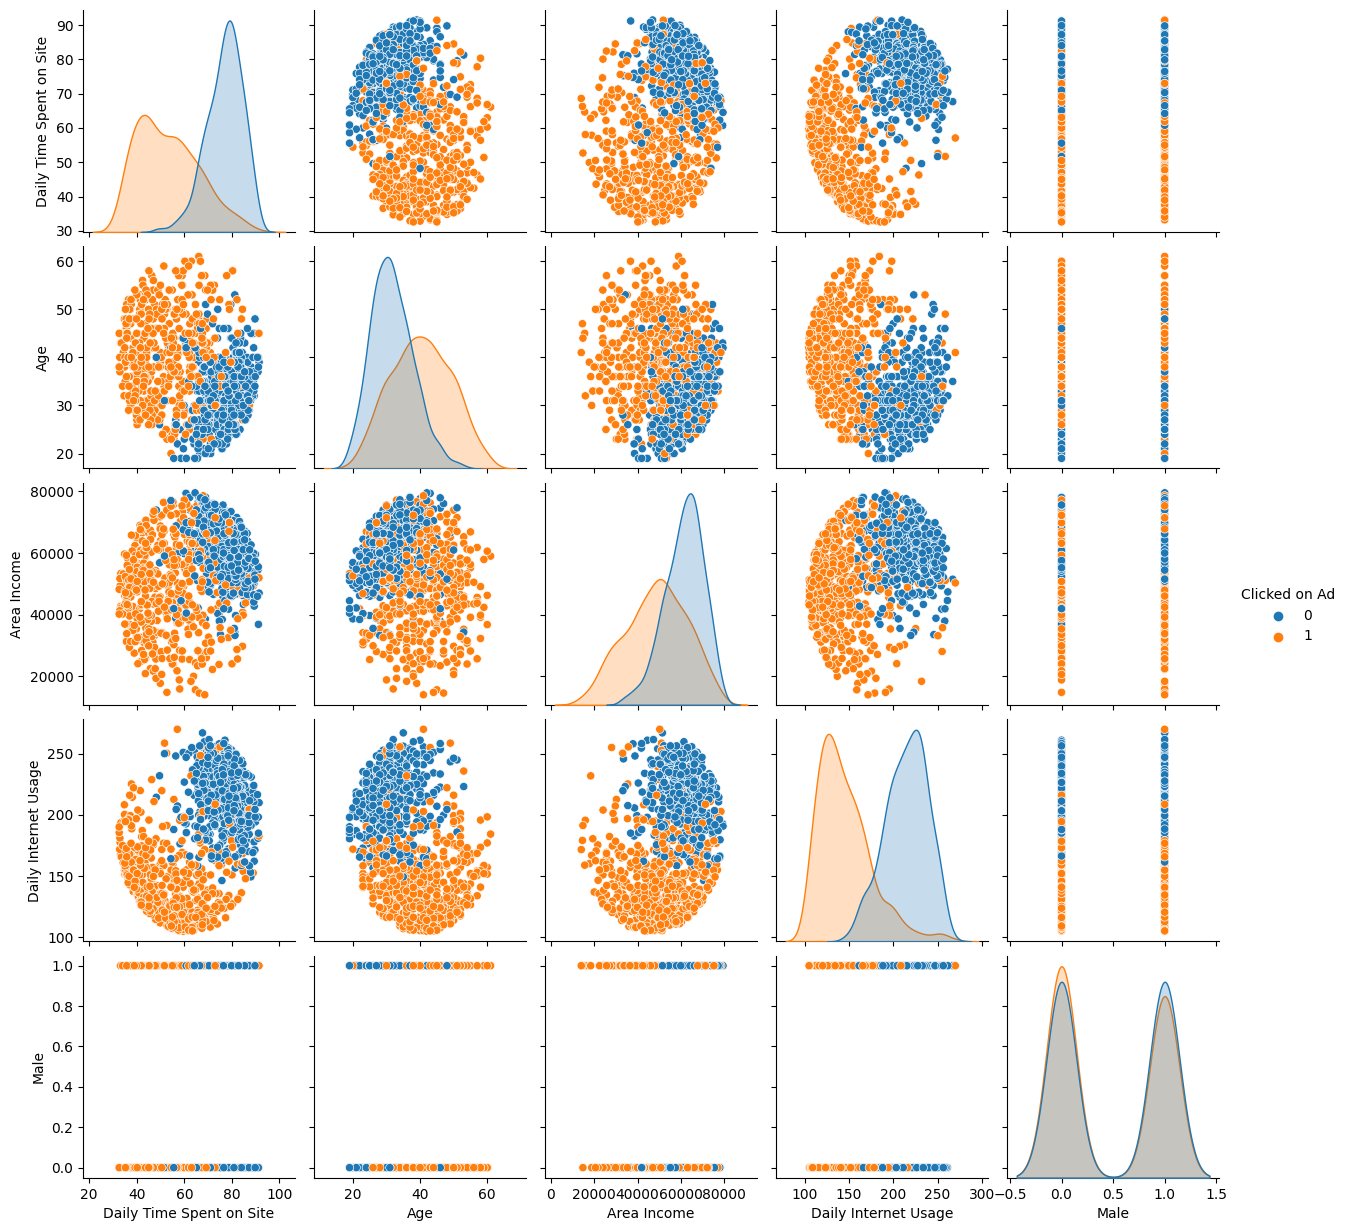

In [57]:
sns.pairplot(df, hue='Clicked on Ad');

## Train | Test Split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']] #sectigimiz featureler
y = df['Clicked on Ad']

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

## Modelling and Model Performance

In [86]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

In [87]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [88]:
#base_estimator=DecisionTreeRegressor(max_depth=1)  bu satir, altsatirdaki kod ile ayni isi yapar;

ada_model = AdaBoostClassifier(n_estimators=50, random_state=42)

# base_estimator=None;  DT gibi agac olustur max_dept = 1 olarak calis demek. Weak Learning (1 katman olustur, dur) mantigi bu. max_dept = 2 yap ama 3 yapma, yoksa "weak learning" mantigindan cikar, OVERFIT'e gider hemen. 

# n_estimators=50; Agac sayisi

# learning_rate=1.0; Vadiye inerken attigimiz adimin boyutu gibi. Adimi cok kisa yaparsak model yavas calisir, adimi cok buyuk tutarsak vadideki min noktayi iskalayabiliriz. Default = 1
# learning_rate=1.0 dersek (agresif calisir, hard calisir) hemen az agacla bilmeye calisir. Agac sayisi az, LR yuksek olursa hemen sonucu bilmeye calisir, OVERFIT'e goturur. 
# gac sayisi 3, learning rate 1 dersek, hemen 3 agacta olayi bitirmeye calisir. OVERFIT'e duser.

# ADABoostong'de --> onceki agac sonrakini etkiler. 

In [89]:
ada_model.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [65]:
eval_metric(ada_model, X_train, y_train, X_test, y_test)

Test_Set
[[41  3]
 [ 4 52]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        44
           1       0.95      0.93      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[454   2]
 [ 12 432]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       456
           1       1.00      0.97      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



In [66]:
# Overfit var gibi,  CV yapalim

In [67]:
from sklearn.model_selection import cross_val_score, cross_validate

model = AdaBoostClassifier(n_estimators=50, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy     0.960000
test_precision    0.968795
test_recall       0.950505
test_f1           0.958988
dtype: float64

In [68]:
# CV sonuclari (asil deger 0.96 imis) test kismina ait sonuclara daha yakin, demek ki OVERFIT yokmus. 

### Default Degerlerle Agaci cizdirelim

In [100]:
X_train.shape

(900, 5)

In [69]:
from sklearn.tree import plot_tree

In [70]:
model = AdaBoostClassifier(n_estimators=3, random_state=42)
model.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=3, random_state=42)

In [71]:
# %matplotlib inline  
# grf cizmezse bunu calistir. 

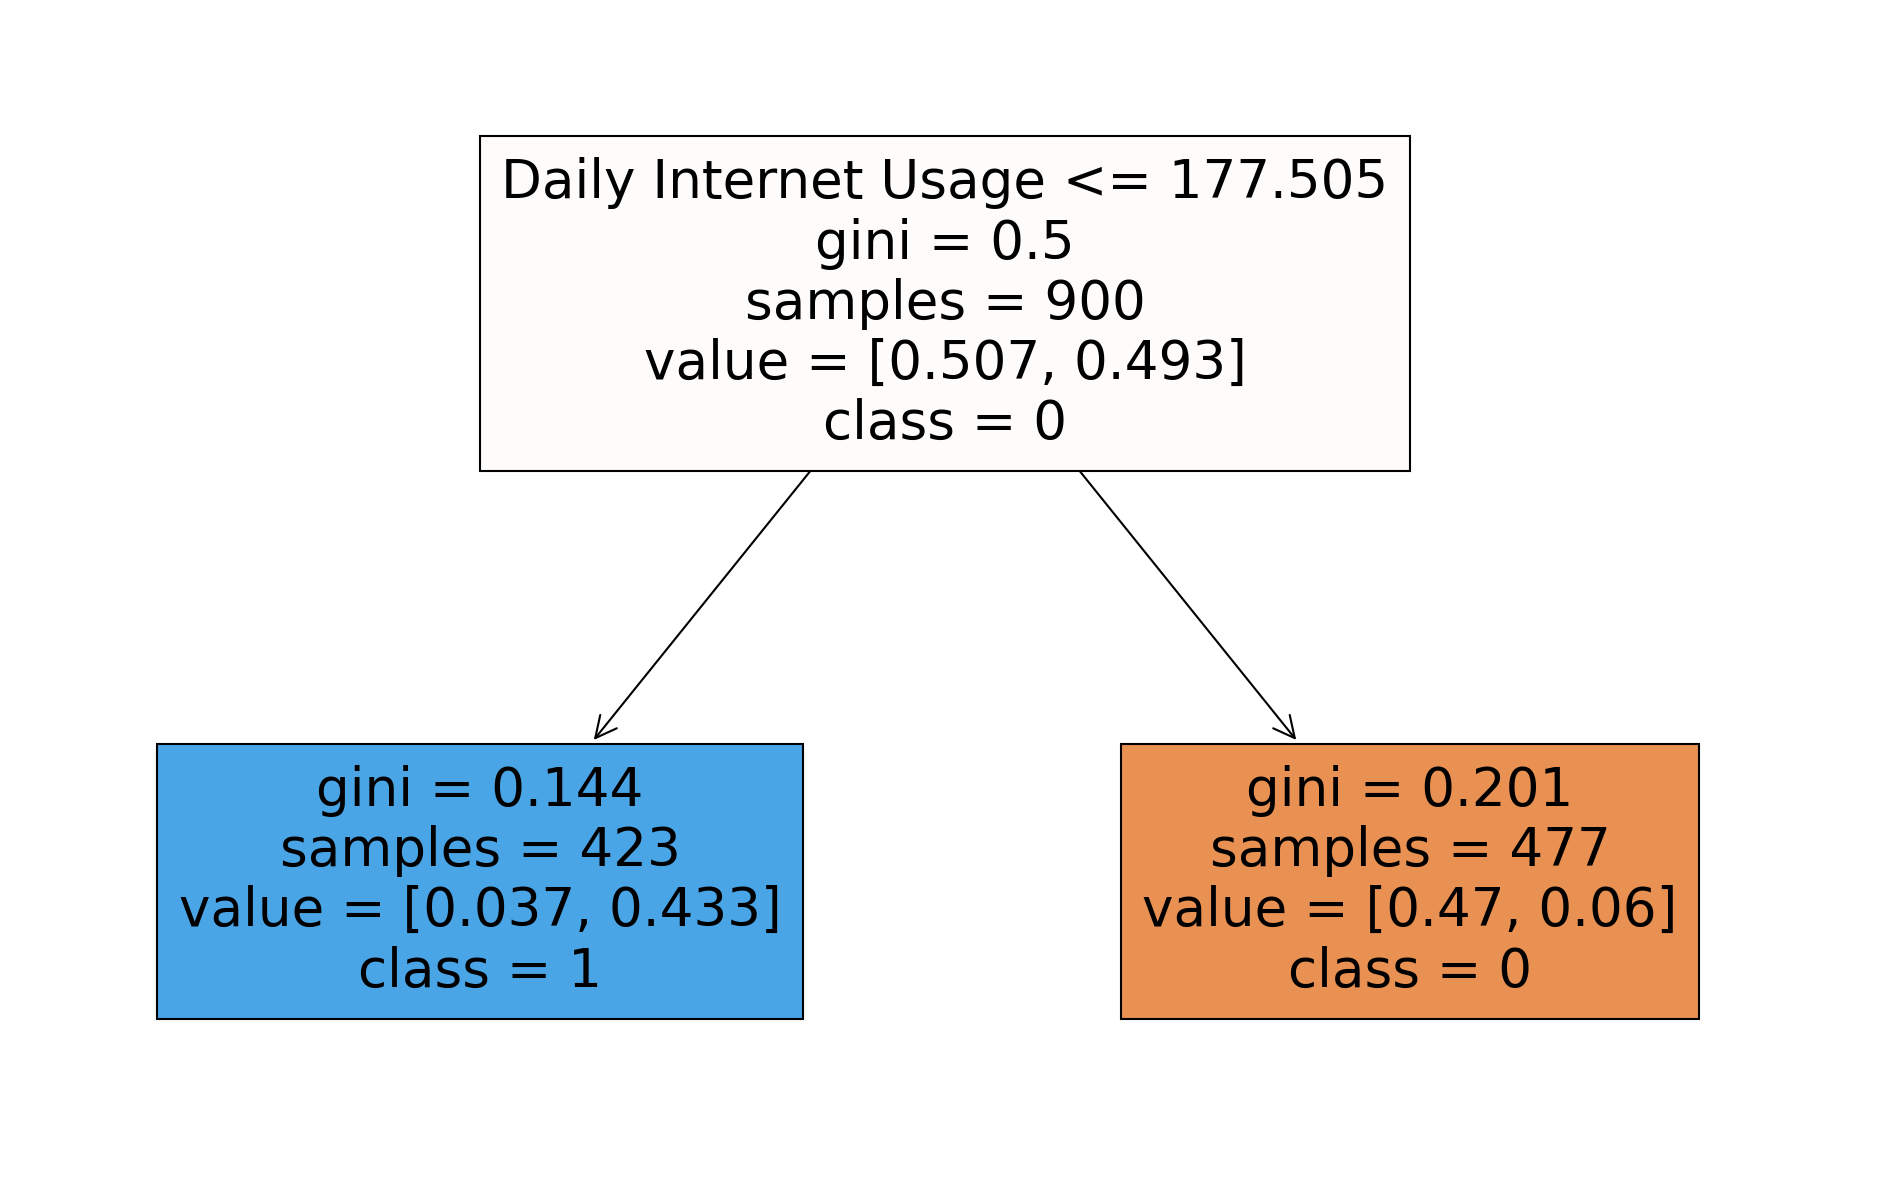

In [102]:
features = list(X.columns)
targets = df["Clicked on Ad"].astype("str") #Target "numeric" ise "string" e çevir, yoksa hata alırsın
plt.figure(figsize=(16,10),dpi=150)
plot_tree(model.estimators_[0], filled=True, feature_names=X.columns, class_names=targets.unique());

In [ ]:
# Boosting yontemde her agacin agirligi farkli olabilir. RF de herkesin oyu esitti. 

** Bir agacta bir gozlem ne kadar fazla olursa onun secilme sansi o kadar fazla olur. **AdaBoost** secilmeyenin adedini artirarak secilme sansini yukseltiyor.  


****** Ağaç root node nasıl seçiyor. Yukarıdaki featurelarımın içinde tek soru ile en iyi bölünebilmeyi sağladığı featureyi seçiyor yani gini si en düşük featureyi ve ilk bölünmeyi orada yapıyor. burada ilk ağaca bakalım samples imin tamamını almış 900 observation var. value da 0,507 oranında 0 demiş 0,493 oranında 1 demiş doğal olarak 0 ı sağ tarafa 1 i sol tarafa atmış büyük sağa gidiyor. Sonrasında yanlış olan veriyi bir sonraki ağaça fazla vererek tahmin etme olasılığını artırıyor.

Mantık tamamen gini ye göre oluşuyor. **Bir ağaçta aynı gözlemden ne kadar fazla olursa gini impurity küçük çıkıyordu. Dolayısıyla modelim daha doğru tahminde bulunuyordu**.

**learning rate** ise burada **bilemediği gözlemin bir sonraki ağaca verilme büyüklüğü kısaca 1 olursa bu sayı yüksek küçük olursa bu sayı daha az olabiliyor**. Bundan dolayı **ağaç sayısı ile orantilı bir değer verilmesi gerek**. Örnek olarak ağaç sayısı az learning rate yüksek ise az olan ağaç sayısında bilmek için gayret göstereceğinden oraya fazlaca observation verecek dolayısıyla bu durum beni overfite götürecek bundan dolayı bu değerin n estimator ile uyumlu olması gerekir. ada boosting de DT gibi bu sebepten dolayı overfit sorunu olan bir algoritma.

**Max depth 2 yi geçmesin aksi halde modelin overfit**te gitmesi sebebiyle 3, 4, 5 verdiğinizde tahmin artacak ve bu algoritmanın mantığıyla terse düşecektir. bunu dip bilgi olarak söyledim
*********************************************


Max depth 2'yi gecmesin, yoksa Adaboost overfite gider

week learner  

Ginisi en dusuk olan feature’u seciyor. Ilk bolunmeyi ordan yapiyor.

## Manuel tahmin yapalim

In [74]:
1-1/2

0.5

In [75]:
model.estimator_errors_  # 1., 2., 3 agaclarin error rateleri (ER).   "ER = 1 - f1score"    
# Bunun dusuk olmasi daha iyidir. Dusuk error rate sahip agacin agirligi fazla olur.


# ?????????   Sirali sekilde hatalarin azalmasini beklerdik, neden artti?

array([0.09666667, 0.15660636, 0.29526371])

# ?????????   Sirali sekilde hatalarin azalmasini beklerdik, neden artti?

Agaclarin agirligini hesaplama formulu;

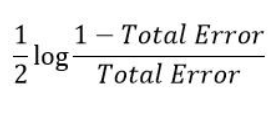

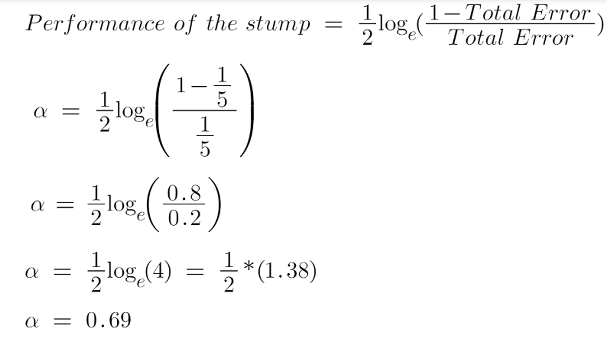


In [76]:
# 1. Agacin agirligi; 

1/2*np.log( (1-0.09666667)/0.09666667 )   #1  demis olsun  
# Bu agac gozlemin 1 sinifina ait oldugunu soylemis. Alttaki deger o agacin agirligi oluyor. 
# 1. agacin agirligini verir. Burada agacin agirligi 1.117

1.117411476360216

In [77]:
# 2. Agacin agirligi; 

1/2*np.log((1-0.15660636)/0.15660636)   #0  demis olsun 

0.8418492023096668

In [78]:
# 3. Agacin agirligi; 

1/2*np.log((1-0.29526371)/0.29526371)   #0   demis olsun

0.43497739343711583

In [79]:
# 0 diyen agaclarin agirliklari toplamini bulalim; 

0.8418492023096668 + 0.43497739343711583

1.2768265957467826

In [80]:
# 0 diyen agaclarin agirlikalri toplami ile 1 diyen agac(larin) agirlik(lari) toplamini karsilastiralim;

1.2768265957467826 > 1.117411476360216

True

In [81]:
# Sonuc True cikti. Demek ki 0 diyen agacla kazandi. 

# 0 diyen agaclarin agirliklari toplami 1 diyen agaclarin agirlikalri toplamindan fazla ise model final karar olarak 0 diyeck. 
# Yukarida: 0.84+0.43 >1.11 old icin final karar gozlemin  0   oldugudur. 

# ADABosst'ta agaclarin agirliklari onemli. 100 agactan 1 diyen 10 tanesinin agirliklari toplami, 0 diyen 90 agacin agirliklari topamindan fazla olursa, model nihari karar olarak 90 agacin degil, 10 agacin dedigini kabul edecek.
# RF'de olsaydi cogunlugun (90 agacin) dedigi kabul edilirdi. Profesorun oyu ile ... :)

## Analyzing performance as more weak learners are added.

In [103]:
error_rates = []

for n in range(1,100):
    
    model = AdaBoostClassifier(n_estimators=n)
    model.fit(X_train,y_train)
    preds = model.predict(X_test)
    err = 1 - f1_score(y_test,preds) # Error Rate buradan hesaplaniyor. 
    
    error_rates.append(err)

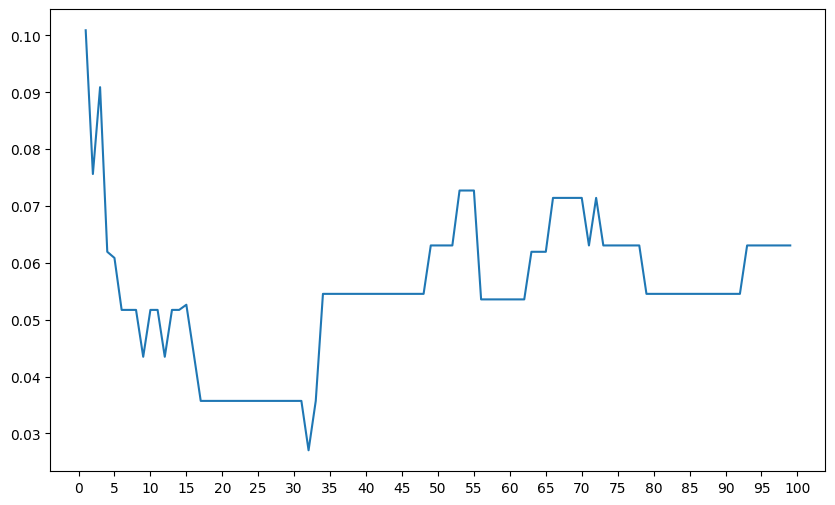

In [104]:
plt.plot(range(1,100), error_rates)
plt.xticks(range(0,101,5));

# Error Rate'lerin grafigini cizdiriyoruz farkli agac numaralai icin. 

* Elbow gibi bilimsel bir kanit saglamaz bu grafik, ama GS icin fikir verir, bak, gec buna.

In [ ]:
# min oldugu nokta (32) olmasi, analiz icin gereken min agac sayisini gosterir. Deme ki agac sayisinin 32 civarinda olmasi yeterli imis. 

# 32'den sonra grafigin belirli seviyelerde devam ediyor olmasi; agac sayisi verirken, verilcek araliklarin acik olmasi gerektigini gosteriyor. 
# Yani 32 den sonra 35 den=mekle 40-45 demek arasinda, modelin error rate leri noktasinda bir fark yok. 
# Agac sayisini 32'dn fazla verceksen 50, 100 gibi ver ki ileridek noktalardaki durumu da gorebilesin. 

#  Once bunu yapinca GSearch icine n_estimator'de neler verecegimizi buradan gorebiliriz. 

# GS de {"n_estimators": [20, 30, 100, 200] icine verdigimiz degerler buradan hareketle verilebilir. 50 de verilebilir burada. 

# Adaboost "Weak learning" bir model. 

## Gridsearch

In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
model = AdaBoostClassifier(random_state=42)

In [115]:
param_grid = {"n_estimators": [20, 30, 100, 200], "learning_rate": [0.01, 0.1, 0.2, 0.5, 1.0]}

In [116]:
ada_grid_model = GridSearchCV(model, param_grid, cv=5, scoring= 'f1') #f1 daha kapsamli old icin secildi. Balanced old. icin ccuracy de yazilabilirdi.

In [117]:
ada_grid_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
                         'n_estimators': [20, 30, 33, 100, 200]},
             scoring='f1')

In [118]:
ada_grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

* learning rate 0.1 bulmus, hard yapmayacak, 2-3 tane hatayi bir sonraki agaca akatacak. Bu sekilde olmasi iyi, overfit riski az olur. 
* Agac sayisi 100 olacak GS ye gore.

In [113]:
ada_grid_model.best_score_  # 5 bolunmeli CV soucu bu 0.96

0.969132103588408

In [119]:
y_pred = ada_grid_model.predict(X_test)

ada_f1 = f1_score(y_test, y_pred)
ada_recall = recall_score(y_test, y_pred)
ada_auc = roc_auc_score(y_test, y_pred)
eval_metric(ada_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[40  4]
 [ 3 53]]
              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.93      0.95      0.94        56

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100


Train_Set
[[453   3]
 [ 18 426]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       456
           1       0.99      0.96      0.98       444

    accuracy                           0.98       900
   macro avg       0.98      0.98      0.98       900
weighted avg       0.98      0.98      0.98       900



** CV sonucu 0.96 olup, test kismindaki skorlarla uyumlu, OVERFIT yok....

Ilkel ADABoost sonucu boyleydi; 

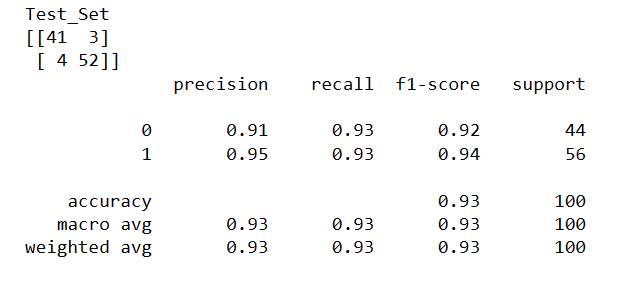


Bu ilkel skorlarla GS sonucu elde edilen sonuclar karsilastirldiginda; Precision azalmis, recall artmis, f1 de bir degisim yok.

GS nin icinde CV gomulu (embed) olarak var oldugu icin GS sonrasi bir daha CV yapmiyoruz. GS sonuclari kesin sonuclardir. 

## Feature_importances

In [120]:
model = AdaBoostClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)
model.feature_importances_

feats = pd.DataFrame(index=X.columns, data= model.feature_importances_, columns=['ada_importance'])
ada_imp_feats = feats.sort_values("ada_importance")
ada_imp_feats

,ada_importance
Male,0.00
Area Income,0.21
Age,0.22
Daily Time Spent on Site,0.28
Daily Internet Usage,0.29


In [ ]:
# tahminlemye en fazla katki saglayan feature "Daily Internet Usage". 

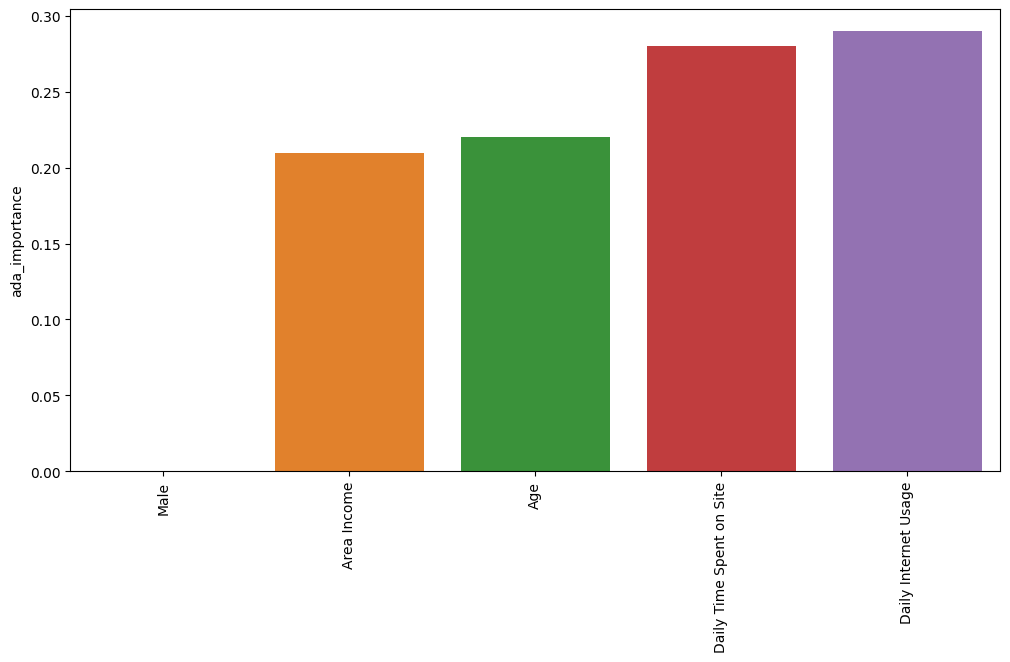

In [121]:
plt.figure(figsize=(12,6))
sns.barplot(data=ada_imp_feats ,x=ada_imp_feats.index, y='ada_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

Modelin GENEL PERFORMANSINI gosterir

In [122]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score

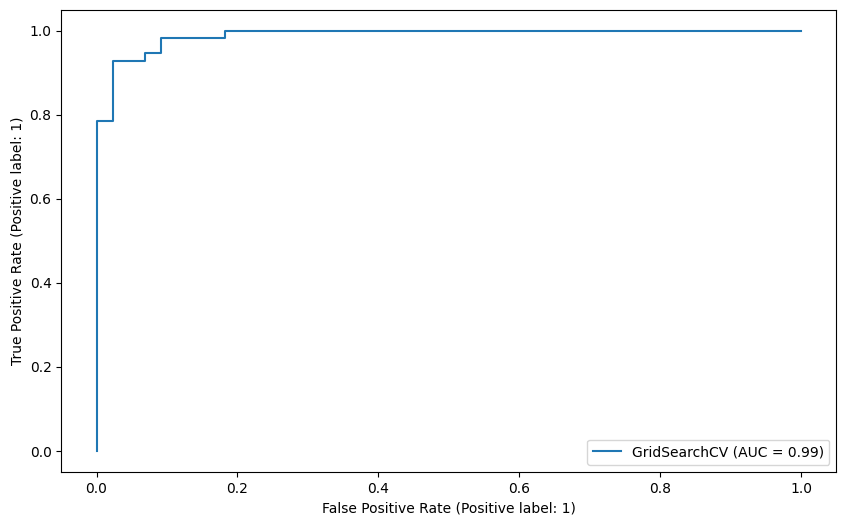

In [123]:
plot_roc_curve(ada_grid_model, X_test, y_test)

* Modelin genel performansi 0.99, cok iyi. 

* ADABoost; her agacta bir oncekinn hatasini azaltmaya calistigi icin nihahi olarak elde ettigi tahminin basarisi cok guzel oluyor. 


*********** Burada Kaldik ***************

## Gradient Boosting Modelling and Model Performance

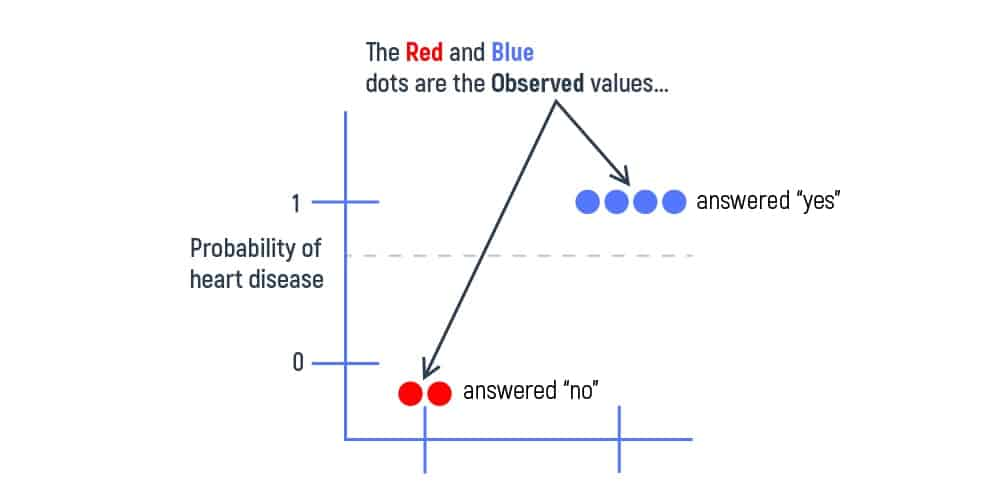

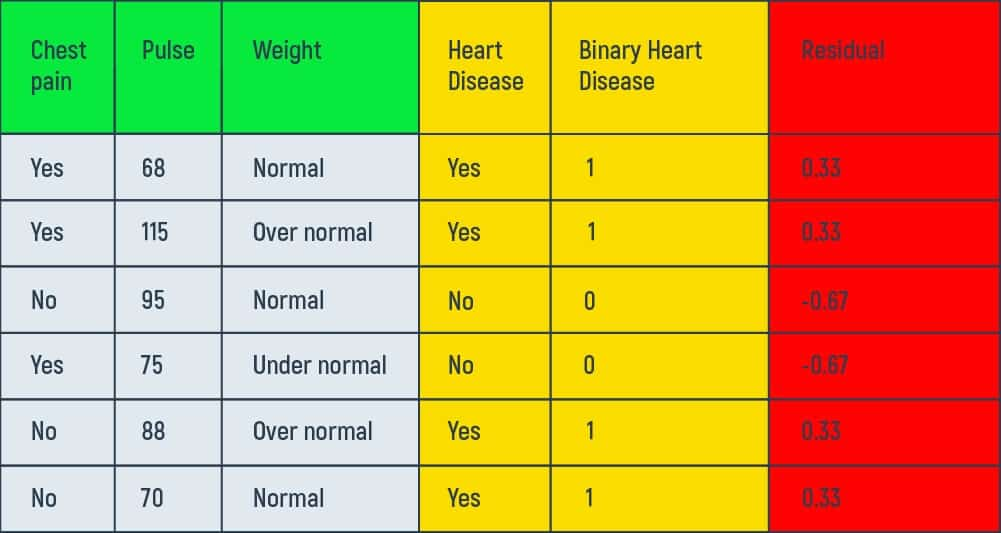

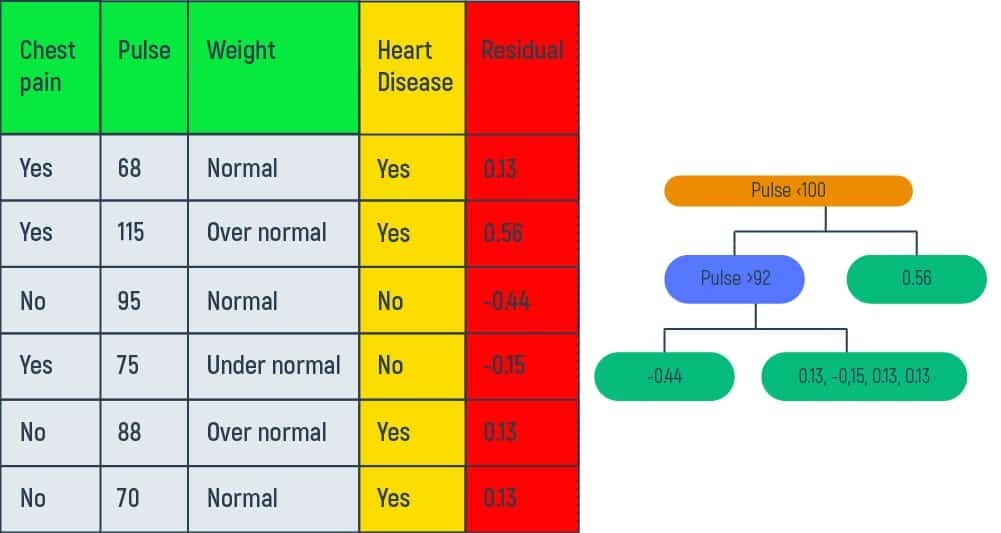

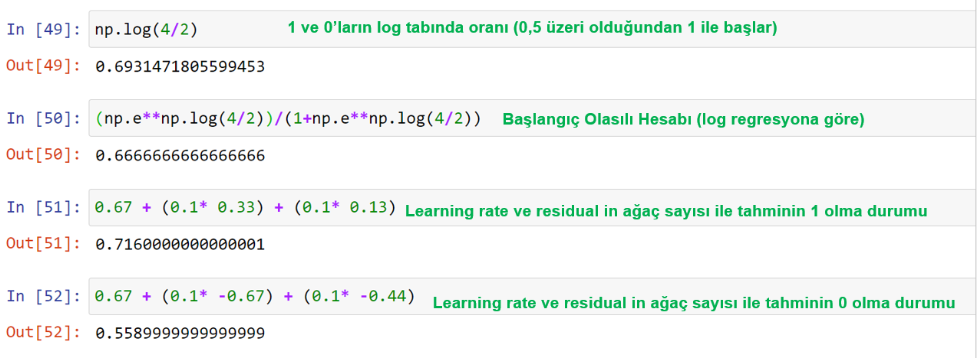

In [ ]:
np.log(4/2) 

In [ ]:
(np.e**np.log(4/2))/(1+np.e**np.log(4/2))

In [ ]:
0.67 + (0.1* 0.33) + (0.1* 0.13)

In [ ]:
0.67 + (0.1* -0.67) + (0.1* -0.44)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
grad_model = GradientBoostingClassifier(random_state=42)

In [ ]:
grad_model.fit(X_train, y_train)

In [ ]:
eval_metric(grad_model, X_train, y_train, X_test, y_test)

In [ ]:
model = GradientBoostingClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## Gridsearch

In [ ]:
param_grid = {"n_estimators":[100, 200, 300],
             "subsample":[0.5, 1], "max_features" : [None, 2, 3, 4]} #"learning_rate": [0.001, 0.01, 0.1], 'max_depth':[3,4,5,6]

In [ ]:
gb_model = GradientBoostingClassifier(random_state=42)

In [ ]:
grid = GridSearchCV(gb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
grid.best_score_

In [ ]:
y_pred = grid.predict(X_test)

gb_f1 = f1_score(y_test, y_pred)
gb_recall = recall_score(y_test, y_pred)
gb_auc = roc_auc_score(y_test, y_pred)

eval_metric(grid, X_train, y_train, X_test, y_test)

## Feature importances

In [ ]:
model = GradientBoostingClassifier(max_features= 3, n_estimators = 100, subsample = 0.5, random_state=42)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['grad_importance'])
grad_imp_feats = feats.sort_values("grad_importance")
grad_imp_feats

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_importance')

plt.xticks(rotation=90);

## Evaluating ROC Curves and AUC

In [ ]:
plot_roc_curve(grid, X_test, y_test);

## XG Boosting Modelling and Model Performance

In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier(random_state=42).fit(X_train, y_train)

In [ ]:
eval_metric(xgb, X_train, y_train, X_test, y_test)

In [ ]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1', 'roc_auc'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## Gridsearch

In [ ]:
param_grid = {"n_estimators":[50, 100, 200],'max_depth':[3,4,5], "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8, 1], "colsample_bytree":[0.5,0.7, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=42)

In [ ]:
#from sklearn.metrics import make_scorer 

In [ ]:
#xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = make_scorer(precision_score,  average=None, pos_label=1), verbose=2, n_jobs = -1).fit(X_train, y_train)

In [ ]:
xgb_grid = GridSearchCV(xgb_model, param_grid, scoring = "f1", verbose=2, n_jobs = -1).fit(X_train, y_train)

In [ ]:
xgb_grid.best_params_

In [ ]:
xgb_grid.best_score_

In [ ]:
y_pred = xgb_grid.predict(X_test)

xgb_f1 = f1_score(y_test, y_pred)
xgb_recall = recall_score(y_test, y_pred)
xgb_auc = roc_auc_score(y_test, y_pred)

eval_metric(xgb_grid, X_train, y_train, X_test, y_test)

## Feature importances

In [ ]:
model = XGBClassifier(random_state=42, colsample_bytree = 0.5, subsample= 0.8)
model.fit(X_train, y_train)

model.feature_importances_

feats = pd.DataFrame(index=X.columns, data=model.feature_importances_, columns=['xgb_importance'])
xgb_imp_feats = feats.sort_values("xgb_importance")
xgb_imp_feats

In [ ]:
sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index,y='xgb_importance')

plt.xticks(rotation=90);

## Feature importance comparison

In [ ]:
pd.concat([ada_imp_feats, grad_imp_feats, xgb_imp_feats], axis=1)

## Evaluating ROC Curves and AUC

In [ ]:
plot_roc_curve(xgb_grid, X_test, y_test);

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
rf_f1 = f1_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_auc = roc_auc_score(y_test, y_pred)
eval_metric(rf_model, X_train, y_train, X_test, y_test)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
dt_f1 = f1_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_auc = roc_auc_score(y_test, y_pred)
eval_metric(dt_model, X_train, y_train, X_test, y_test)

## Logistic Regression

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
scaler = MinMaxScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_model=LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred=log_model.predict(X_test_scaled)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)
y_pred = knn_model.predict(X_test_scaled)
knn_f1 = f1_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_auc = roc_auc_score(y_test, y_pred)
eval_metric(knn_model, X_train_scaled, y_train, X_test_scaled, y_test)

## SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)
svc_f1 = f1_score(y_test, y_pred)
svc_recall = recall_score(y_test, y_pred)
svc_auc = roc_auc_score(y_test, y_pred)
eval_metric(svm_model, X_train_scaled, y_train, X_test_scaled, y_test)

## Comparing Models

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "KNN", "SVM", "Decision Tree", "Random Forest", "AdaBoost",
                                 "GradientBoost", "XGBoost"],
                        "F1": [log_f1, knn_f1, svc_f1, dt_f1, rf_f1, ada_f1, gb_f1, xgb_f1],
                        "Recall": [log_recall, knn_recall, svc_recall, dt_recall, rf_recall, ada_recall, gb_recall, xgb_recall],
                        "ROC_AUC": [log_auc, knn_auc, svc_auc, dt_auc, rf_auc, ada_auc, gb_auc, xgb_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()